# AIN 214 - PA1 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 03.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/


# Necessary Imports

In [1]:
import numpy as np
import pandas as pd
from sqlite3 import connect
import sqlite3
pd.set_option('display.max_columns', None)

# Notes:
* Use pandas dataframe (df) to load the data. 
* Use numpy or pandas operations for the requested tasks unless otherwise specified. Use of naive for loops is not considered valid.
* For the db operations, use sqlite3 library in Python

# 1st Set of Questions on Boston Housing Dataset **(30 Pts)**

* Retrieved from KAGGLE
* **Dataset Path: "Data/BostonHousing.csv"**

## Q1. Basic Data Exploration **(10 Pts)**
1. Load the data into Pandas DataFrame and print the column names. **(1 pts)**
2. Display the first and last 10 rows of the dataset. **(1 pts)**
3. Display random 10 rows. **(1 pts)**
4. Display random 10 rows with a seed, ie, it outputs the same random rows everytime it is run. **(1 pts)**
5. Display every 15th row. **(1 pts)**
6. Get the summary stats of the dataset regarding each column. **(2 pts)**
7. Identify and count the number of missing values in each column. **(3 pts)**

In [2]:
# Load the data into Pandas DataFrame and print the column names

In [3]:
# Display the first and last 10 rows of the dataset.

In [4]:
# Display the random 10 rows

In [5]:
# sample using seed

In [6]:
# Display every 15th row

In [7]:
# Get the summary stats of the dataset regarding each column

In [8]:
# Identify and count the number of missing values in each column

## Q2. Data Filtering (10 pts)

1. Extract records where the rm (average number of rooms per dwelling) >= 7.   **(2 pts)**
2. Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.  **(2 pts)**
3. Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above the 75th percentile of the dataset. This would give neighborhoods with relatively larger homes, lower "lower-status" population percentage, and higher median values.  **(2 pts)**
4. Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox (nitric oxides concentration) is in the bottom 10%, indicating neighborhoods that are farther from employment centers and have cleaner air.  **(2 pts)**
5. From the houses built before 1940 (AGE column), select those which fall in the top 20% in terms of nitric oxide concentrations (NOX). From this subset, retrieve the bottom 10 records with the lowest MEDV values.  **(2 pts)**

In [9]:
# Extract records where the rm >= 7

In [10]:
# Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.

In [11]:
# Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above 
# the 75th percentile of the dataset. 

In [12]:
# Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox 
# (nitric oxides concentration) is in the bottom 10%

In [13]:
# From the houses built before 1940 (age column), select those which fall in the top 20% in terms of nitric oxide concentrations (nox). From this subset,
# retrieve the bottom 10 records with the lowest medv values.

## Q3. Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio). **(10 Pts)**
The ptratio is categorized into
* Low if ptratio <= 15
* Medium if 15 < ptratio <= 20
* High if ptratio > 20

In [14]:
#  Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio)

# 2nd Set of Questions on the shot1.csv and shot2.csv Datasets **(30 Pts)**

* **Dataset Path: "Data/shot1.csv" and "Data/shot2.csv"**

## Q1. Data Merging and Consistency Checking **(10 Pts)**

* Combine the data from "shot1.csv" and "shot2.csv" into a single DataFrame, ensuring no redundant columns are present. Merge by the redundant column names, representing the same info with different naming.
*  After merging, perform a consistency check for any duplicated rows and provide a summary of your findings. Give the details (avg, mean, etc) of each feature.

### Reading data from "shot1.csv" and "shot2.csv" ###

In [15]:
# read csv s into dfs 
df1 = pd.read_csv("Data/shot1.csv")
df2 = pd.read_csv("Data/shot2.csv")

In [16]:
# merge dfs, removing redundant columns
df2['GAME_ID']=df2['GAME_IDENTIFICATION']
df2.drop(columns=['GAME_IDENTIFICATION'], inplace=True)

In [17]:
# inspecting shot1.csv data
df1.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,made
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,missed
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,missed
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,missed
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,missed


In [18]:
#inspect shot2.csv data
df2.head()

,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_ID
0,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,21400899
1,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,21400899
2,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,21400899
3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,21400899
4,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,21400899


In [19]:
#i've added an id column to each df to make it easier to merge them
df2['id']=df2.index
df1['id']=df1.index

In [20]:
print(df1.shape)
print(df2.shape)

(128069, 14)
(128069, 12)


In [21]:
# merge dfs
df_merged = pd.merge(df1, df2, how='outer', on=['GAME_ID', 'SHOT_RESULT','SHOT_DIST','id'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  SHOT_RESULT                 128069 non-null  object 
 13  id            

### Inspecting the merged dataframe named df_merged ###
Before using an id column, merged dataframe had identical instances. After realising that , an id column is added which fixed the issue.

In [22]:

df1.loc[(df1['GAME_ID']==21400899)&(df1['SHOT_DIST']==7.7)&(df1['SHOT_RESULT']=='made')]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,made,0
127461,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,4.3,7.7,made,127461


In [23]:
df2.loc[(df2['GAME_ID']==21400899)&(df2['SHOT_DIST']==7.7)&(df2['SHOT_RESULT']=='made')]

,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_ID,id
0,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,21400899,0
127461,7.7,2,made,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127,21400899,127461


In [24]:
df_merged.loc[(df_merged['GAME_ID']==21400899)&(df_merged['SHOT_DIST']==7.7)&(df_merged['SHOT_RESULT']=='made')]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,id,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,made,0,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
127461,21400899,"MAR 04, 2015 - BKN vs. CHA",H,L,-24,5,2,11:06,14.7,5,4.3,7.7,made,127461,2,"Roberts, Brian",203148,2.9,1,2,jarrett jack,101127


In [25]:
# check for duplicate rows and provide a summary of the findings for each feature

# aligned 'id' column as first column
cols = df_merged.columns.tolist()
cols.insert(0, cols.pop(cols.index('id')))
df_merged = df_merged[cols]

# check for duplicate rows
print("Number of duplicate rows : ",df_merged.duplicated().sum())

print("General information about the dataset:")
df_merged.info()


Number of duplicate rows :  0
General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          128069 non-null  int64  
 1   GAME_ID                     128069 non-null  int64  
 2   MATCHUP                     128069 non-null  object 
 3   LOCATION                    128069 non-null  object 
 4   W                           128069 non-null  object 
 5   FINAL_MARGIN                128069 non-null  int64  
 6   SHOT_NUMBER                 128069 non-null  int64  
 7   PERIOD                      128069 non-null  int64  
 8   GAME_CLOCK                  128069 non-null  object 
 9   SHOT_CLOCK                  122502 non-null  float64
 10  DRIBBLES                    128069 non-null  int64  
 11  TOUCH_TIME                  128069 non-null  float64
 12  SHO

In [26]:
numeric_cols = df_merged._get_numeric_data().columns.tolist()
categorical_cols = list(set(df_merged.columns) - set(numeric_cols))

print("There are {} numeric columns and {} categorical columns.".format(len(numeric_cols), len(categorical_cols)))
print("Numeric columns: ", numeric_cols)
print("Categorical columns: ", categorical_cols)

There are 15 numeric columns and 7 categorical columns.
Numeric columns:  ['id', 'GAME_ID', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS', 'player_id']
Categorical columns:  ['CLOSEST_DEFENDER', 'GAME_CLOCK', 'player_name', 'SHOT_RESULT', 'MATCHUP', 'LOCATION', 'W']


In [27]:
print("This is the summary of the numeric columns:")
df_merged[numeric_cols].describe()

This is the summary of the numeric columns:


,id,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,128069.00000,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,64034.00000,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,36970.48015,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,0.00000,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,32017.00000,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,64034.00000,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,96051.00000,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,128068.00000,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


* As seen above 'pts' , 'fgm' , 'pts_type' can vary between a close range of values.
* Let's check the unique values of these columns to see if they are categorical or not.

In [28]:
print("Unique values of 'pts': ", df_merged['PTS'].unique())
print("Unique values of 'fgm': ", df_merged['FGM'].unique())
print("Unique values of 'pts_type': ", df_merged['PTS_TYPE'].unique())
print("Unique values of 'player_id': ", len(df_merged['player_id'].unique()))

Unique values of 'pts':  [2 0 3]
Unique values of 'fgm':  [1 0]
Unique values of 'pts_type':  [2 3]
Unique values of 'player_id':  281


In [29]:
print("This is the summary of the categorical columns:")
df_merged[categorical_cols].describe()

df_merged['SHOT_RESULT'].value_counts()

This is the summary of the categorical columns:


SHOT_RESULT
missed    70164
made      57905
Name: count, dtype: int64

## Q2. Player’s Shooting Accuracy Analysis **(10 Pts)**
* Using the combined DataFrame from Question 1, calculate and display the shooting accuracy of each player. 
* Shooting accuracy = the ratio of successful shots (SHOT_RESULT) to total shots taken
* Display the top 5 players based on shooting accuracy

In [30]:
df_sh_accuracy= df_merged.groupby('player_id')['SHOT_RESULT'].value_counts(normalize=True).unstack()
df_sh_accuracy['Shooting Accuracy']=df_sh_accuracy['made']*100
df_sh_accuracy.drop(columns=['made','missed'], inplace=True)
df_sh_accuracy.sort_values(by=['Shooting Accuracy'], ascending=False,inplace=True)

In [31]:
print("Top 5 players with the HIGHEST shooting accuracy:")
df_sh_accuracy.head(5)

Top 5 players with the HIGHEST shooting accuracy:


SHOT_RESULT,Shooting Accuracy
player_id,
201599,71.246819
2199,67.647059
203497,62.546816
202962,61.702128
201949,61.414791


In [32]:
print("Top 5 players with the LOWEST shooting accuracy:")
df_sh_accuracy.tail(5)

Top 5 players with the LOWEST shooting accuracy:


SHOT_RESULT,Shooting Accuracy
player_id,
101126,34.158416
203917,33.854167
1713,33.215548
201196,32.876712
2034,30.851064


## Q3. Analyze the Relationship between shooting distance (SHOT_DIST) and shooting success (SHOT_RESULT). **(10 Pts)**
* Bin the shots into categories based on distance. **STATE AND REASON ABOUT YOUR LOGIC HERE!** (How to apply binning)
* Calculate the shooting accuracy for each bin. 
* **COMMENT** on your findinds.

### Binning ###
- In order to bin a numerical data to discrete categories, we need to specify the bin size.  
- There are different binning rules such as Sturges' Rule,Scott's Rule etc.  

If we are to use Sturges' Rule ->

The formula is:
- K = 1 + 3. 322 logN  
where:
K = number of class intervals (bins).  
N = number of observations in the set.  
log = natural logarithm of the number.

Maximum value of shooting distance :  47.2
Min value of shooting distance :  0.0


<Axes: title={'center': 'Histogram of Shot Distance'}, xlabel='Shot Distance', ylabel='Frequency'>

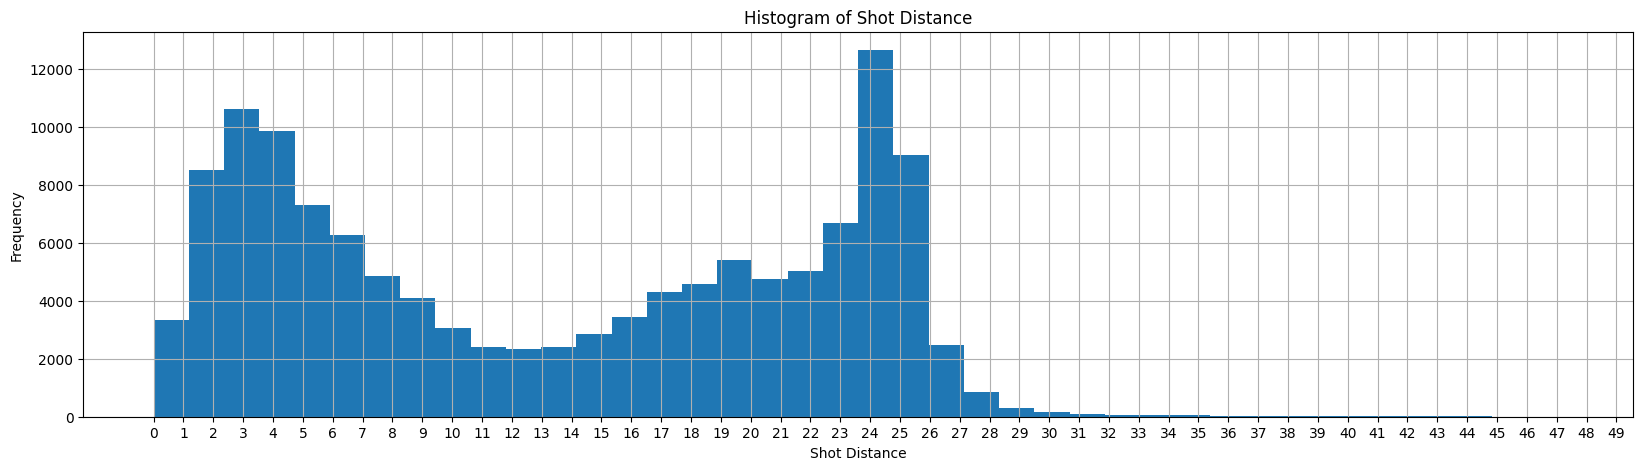

In [33]:
#Choosing the bin size for distances by Sturges' Rule.
N=df_merged['SHOT_DIST'].count() # 128069
k = int(1 + 3.322 * np.log(N)) # 40.06
print("Maximum value of shooting distance : ",df_merged['SHOT_DIST'].max()) # 47.2
print("Min value of shooting distance : ",df_merged['SHOT_DIST'].min()) # 0.0

#Creating a new column with binned shot distances.
df_merged['SHOT_DIST_BINNED'] = pd.cut(df_merged['SHOT_DIST'], bins=k,include_lowest=True)

#Creating a histogram of shot distances.
import matplotlib.pyplot as plt
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Shot Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Shot Distance')
df_merged['SHOT_DIST'].hist(bins=k, figsize=(20,5))

C:\Users\demir\AppData\Local\Temp\ipykernel_30228\2893344465.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist_res= df_merged.groupby('SHOT_DIST_BINNED')['SHOT_RESULT'].value_counts(normalize=True).unstack()


Text(0.5, 1.0, 'Shooting Accuracy by Shot Distance')

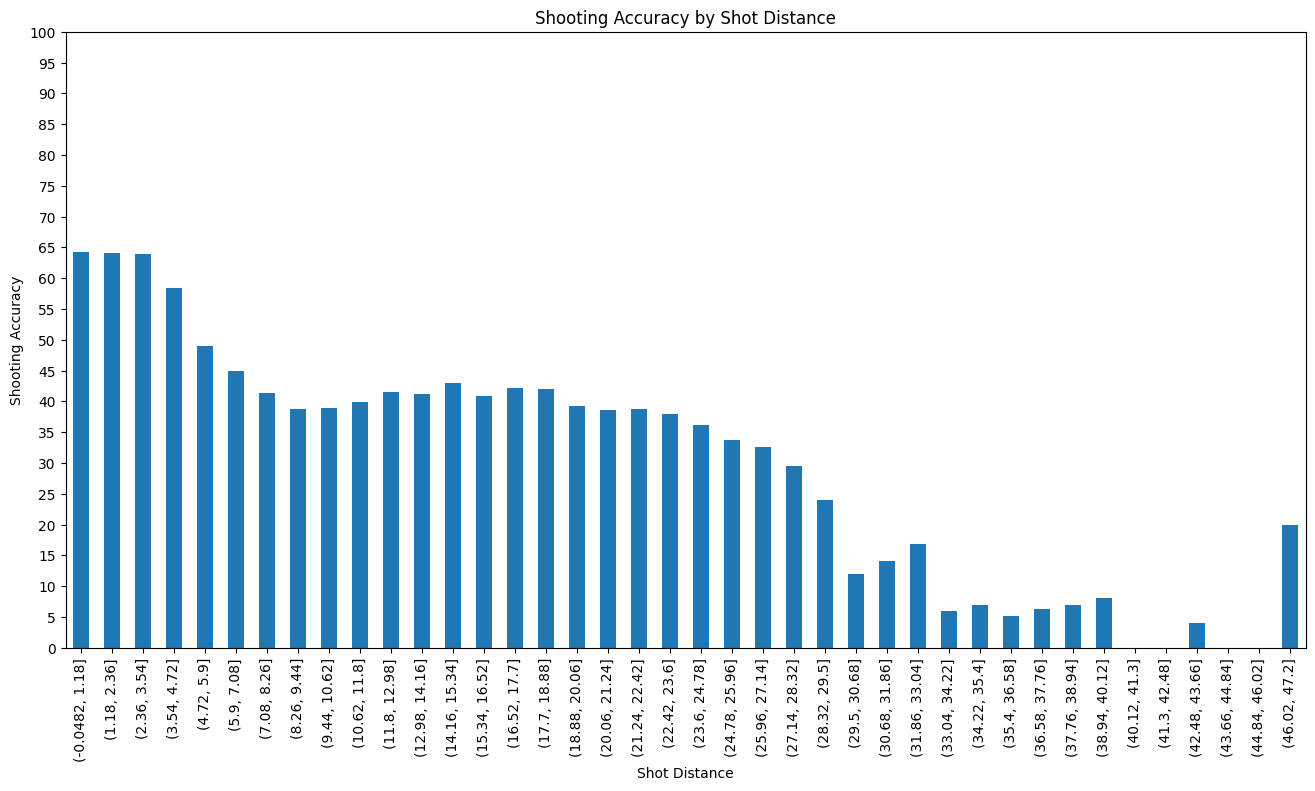

In [34]:
#Creating a dataframe with shooting accuracy grouped by shot distance.
df_dist_res= df_merged.groupby('SHOT_DIST_BINNED')['SHOT_RESULT'].value_counts(normalize=True).unstack()
df_dist_res['Shooting Accuracy']=df_dist_res['made']*100
df_dist_res.drop(columns=['made','missed'], inplace=True)

#Creating a bar chart of shooting accuracy by shot distance.
df_dist_res['Shooting Accuracy'].plot(kind='bar', figsize=(16,8))
plt.xlabel('Shot Distance')
plt.ylabel('Shooting Accuracy')
plt.yticks(np.arange(0, 105, 5))
plt.title('Shooting Accuracy by Shot Distance')


## Operations ##

1. Feature 'shot_dist' is parsed into 40 bins.(explained why it is 40 in 'Binning' section)  

2. Histogram of 'shot_dist' is plotted.  

3. New dataframe is created via grouping by the 'shot_dist_bin' and counting normalized(values vary between 0 - 1) values in 'shot_results' column.  

4. Accuracy-Shot Distance bar graph is plotted.  


## Findings ##

1. By looking at the histogram of *'shot_dist'*, we can obtain that **most of the shots** has been made in a **short distance like (2.36-3.54)** or a **further distance like (23.6-24.8)**.  

2. As the bar graph of Shot Distance and Shooting Accuracy inspected, we can see that **the most accurate shooting** is generally happened when **the distance is between 0 and 3.54 (first 3 bins)**. After these bins , accuracy starts to **fall** down in a *negative trend*.  

3. Personal Note: I've found it strange that the **accuracy in the last bin (46.02 to 47.2) is higher than the ones in shorter distances(i.e. 29.50 - 30.68)**. I do not think that is an outlier but i think that's an obvious anomaly to detect. 


# 3rd Set of Questions on SQL - **using sqlite3 library!** **(40 Pts)**

* **Dataset Path: "Data/annots.csv"**

Here you are given a file: annots.csv, with the protein - gene ontology (GO) term associations/annotations. Gene ontology is a framework, representing the properties of genes and proteins. This is basically a Graph - more spesifically a directed acyclic graph (DAG), representing a level-ordered hierarchy with three subgraphs: MF, CC, and BP. Here, **each** node in the graph, which we term as **"GO Term" corresponds to a function of a protein.**

* If protein is annotated with a GO Term, then the protein has the function represented by this GO Term. 
* A protein can be and most of the time is annotated with multiple GO terms, and vice versa. 

In the annots.csv file, we have the annotation data, where each row corresponds to a protein - GO term annotation with the following columns: ProteinID,ProtSeq, GO_ID, Sub_Graph, Level. ProteinID is the specifier of the protein and the ProtSeq is the aminoacid sequence of this protein. GO_ID, Sub_Graph, and Level are properties of a GO Term. 

**Now, we want to store this data in a relational database, with the following table schemas:**

## Table 1: GoTerms:

| Column   | Type    | Key        | Description                |
|----------|---------|------------|----------------------------|
| GoID     | TEXT    | PRIMARY KEY| Gene Ontology Identifier   |
| SubGraph | TEXT    |            | Subgraph Type (BP, MF, CC) |
| Level    | INTEGER |            | Ontology level             |


## Table 2: Proteins

| Column     | Type | Key        | Description                |
|------------|------|------------|----------------------------|
| ProteinID  | TEXT | PRIMARY KEY| Unique Protein Identifier  |
| ProtSeq  | TEXT | | Amino Acid Sequence |

## Table 3: Annotations

| Column    | Type | Key                       | Description               |
|-----------|------|---------------------------|---------------------------|
| GoID      | TEXT | PRIMARY KEY, FOREIGN KEY  | Gene Ontology Identifier  |
| ProteinID | TEXT | PRIMARY KEY, FOREIGN KEY  | Unique Protein Identifier |


## Q1. Read the csv file and create this DB  **(10 Pts)**

In [35]:
# read file into db and create a db using sqlite3
conn=sqlite3.connect('Data/q3_annots.db')
df_annot=pd.read_csv('Data/annots.csv')

df_annot.head()

df_annot.to_sql('annots_total', conn, if_exists='replace', index=False)

df_annot[['ProteinID','ProtSeq']].to_sql('proteins_old', conn, if_exists='replace', index=False)
df_annot[['GO_ID','Sub_Graph','Level']].to_sql('goterms_old', conn, if_exists='replace', index=False)
df_annot[['GO_ID','ProteinID']].to_sql('annots_old', conn, if_exists='replace', index=False)
#df_read.to_sql('annots_db2', conn, if_exists='replace', index=False)
cursor = conn.cursor()

In [36]:
cursor.execute('''
               CREATE TABLE IF NOT EXISTS Proteins(
               ProteinID TEXT ,
               ProtSeq TEXT,
               PRIMARY KEY(ProteinID));'''
)

cursor.execute('''
               CREATE TABLE IF NOT EXISTS GoTerms(
               GoID TEXT,
               SubGraph TEXT,
               Level INTEGER,
               PRIMARY KEY(GoID));'''
)

cursor.execute('''
               CREATE TABLE IF NOT EXISTS Annotations(
               GoID TEXT,
               ProteinID TEXT ,
               FOREIGN KEY (GoID) REFERENCES GoTerms(GoID),
               FOREIGN KEY (ProteinID) REFERENCES Proteins(ProteinID),
               PRIMARY KEY(GoID,ProteinID) );'''
)

In [37]:
cursor.execute('''SELECT name FROM sqlite_master WHERE type='table';''')
cursor.fetchall()

[('annots_total',),
 ('proteins_old',),
 ('goterms_old',),
 ('annots_old',),
 ('Proteins',),
 ('GoTerms',),
 ('Annotations',)]

In [43]:
cursor.execute('''SELECT * FROM Annotations LIMIT 5;''')
cursor.fetchall()
cursor.execute(''' pragma table_info(GoTerms);''')
cursor.fetchall()


[(0, 'GoID', 'TEXT', 0, None, 1),
 (1, 'Sub_Graph', 'TEXT', 0, None, 0),
 (2, 'Level', 'INTEGER', 0, None, 0)]

In [41]:
cursor.execute(''' pragma table_info('annots_total');''')
cursor.fetchall()
cursor.execute('''
               CREATE TABLE IF NOT EXISTS copy_annots(
               GoID TEXT,
               ProteinID TEXT ,
               ProtSeq TEXT,
                Sub_Graph TEXT,
                Level INTEGER,
               FOREIGN KEY (GoID) REFERENCES GoTerms(GoID),
               FOREIGN KEY (ProteinID) REFERENCES Proteins(ProteinID),
               PRIMARY KEY(GoID,ProteinID) );'''
)

cursor.execute(''' INSERT INTO copy_annots (GoID, ProteinID, ProtSeq, Sub_Graph, Level)
                    SELECT Annotations.GoID, Annotations.ProteinID, annots_total.ProtSeq, annots_total.Sub_Graph, annots_total.Level
                    FROM annots_total , Annotations
                    WHERE Annotations.GoID = annots_total.GO_ID AND Annotations.ProteinID = annots_total.ProteinID;
               
               ''')
cursor.fetchall()

[]

In [42]:
cursor.execute(''' INSERT INTO GoTerms (GoID,SubGraph, Level)
                    SELECT copy_annots.G0_ID, copy_annots.Sub_Graph, copy_annots.Level
                    FROM copy_annots , Annotations
                    WHERE Annotations.GoID = copy_annots.GO_ID AND Annotations.ProteinID = copy_annots.ProteinID;
               
               ''')

OperationalError: table GoTerms has no column named SubGraph

In [93]:
#cursor.execute(''' INSERT INTO Annotations SELECT * FROM annots_old;''')
#cursor.execute(''' DELETE FROM Annotations;''')
#cursor.execute(''' INSERT INTO Proteins SELECT * FROM proteins_old;''')
cursor.execute(''' INSERT INTO GoTerms SELECT * FROM goterms_old;''')
cursor.execute(''' SELECT * FROM GoTerms;''')
cursor.fetchall()

IntegrityError: UNIQUE constraint failed: GoTerms.GoID

## Q2. Define a function to extract all GO terms associated with a given amino acid sequence (ProtSeq), ensuring that the GO terms satisfy the following criteria: they are annotated with at least 50 proteins in MF and CC subgraphs, and 100 proteins in the BP subgraph.. **(10 Pts)**

In [132]:
prot_seq = "WYTWADEAHAKNIVMCFRMHGEAYEKAAVYMNRSPEFMGCRADNNDEYDV" #  example protein sequence

# function to extract the annotated GO terms with the above specs
def extract_go_terms(prot_seq):
    results = []
    # ADD YOUR CODE HERE
    return results

## Q3. Print the average number of annotations a GO terms has for each level in each subgraph (MF, CC, and BP) **(10 Pts)**

In [133]:
# Print the avg # of annots

## Q4. Identify the ProteinID with the longest ProtSeq within the Proteins table. Modify its ProtSeq to half its original length by trimming the sequence, update the ProteinID to "trimmed", and display the updated ProteinID and ProtSeq with its GO Term annotations. **(10 Pts)**

In [134]:
# find and trim the longest sequence, displaying the updated ProtID and ProtSeq, and its annotated GO Terms

# PLAGIARISM
All work on assignments must be done individually. You are encouraged to discuss
the given assignments with your classmates, but these discussions should be carried out
in an abstract way. That is, discussions related to a particular solution to a specific prob-
lem (either in actual code or in pseudocode) will not be tolerated. In short, turning
in someone else’s work (including work available on the internet), in whole or in part, as
your own will be considered as a violation of academic integrity. Please note that the
former conditions also hold for the material attained using AI tools, including ChatGPT,
GitHub Copilot, etc.